In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Exploration

In [2]:
# load two csv files
credit = pd.read_csv('./movie/tmdb_5000_credits.csv')
movie = pd.read_csv('./movie/tmdb_5000_movies.csv')

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
credit.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


From the first 5 rows of credit table, we found that some variables are lists. We need to extract useful variables from those lists. 

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movie.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Observing 5 rows of movie table, we need to split genres and drop irrelevant columns.

# Data Cleaning
## merge two table on movie id

In [7]:
movie = movie.rename(columns={"id":"movie_id"})

In [8]:
# merge two dataset with their common column
raw_df = pd.merge(movie, credit, on = 'movie_id')
raw_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
movie.shape, credit.shape, raw_df.shape

((4803, 20), (4803, 4), (4803, 23))

From the statistics information above, we have 4803 observations of 23 variables. We also acquire the data type of each factor.

## Handle Json Columns
There are 6 variables which are list type. We use convert function to split and extract useful information from them.

In [11]:
json_cols = ['genres', 'keywords', 'production_companies','production_countries',
            'spoken_languages','cast', 'crew']
raw_df[json_cols].head()

,genres,keywords,production_companies,production_countries,spoken_languages,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
import ast

In [13]:
raw_df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
def convert(data):
    result = []
    for i in ast.literal_eval(data):
        result.append(i['name'])
    return result

In [15]:
raw_df['genres'] = raw_df['genres'].apply(convert)
raw_df['genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [16]:
raw_df['keywords'] = raw_df['keywords'].apply(convert)
raw_df['production_companies'] = raw_df['production_companies'].apply(convert)
raw_df['production_countries'] = raw_df['production_countries'].apply(convert)

## Preserve top 4 cast and the director from the cast list

In [17]:
# extract top 4 cast
def top4_cast(data):
    cnt = 0
    result = []
    for i in ast.literal_eval(data ):
        if cnt<4:
            result.append(i['name'])
            cnt = cnt+1
        if cnt>4:
            break
        
    return result

In [18]:
raw_df['cast'] = raw_df['cast'].apply(top4_cast )

In [19]:
raw_df['cast'][0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang']

In [20]:
# extract director from the cast
def director(data):
    for i in ast.literal_eval(data):
        if i['job'] == 'Director':
            return i['name']

In [21]:
raw_df['Director'] = raw_df['crew'].apply(director)
raw_df['Director'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: Director, dtype: object

## Handle Missing Values

In [22]:
raw_df.isnull().sum().sort_values(ascending=False)

homepage                3091
tagline                  844
Director                  30
overview                   3
runtime                    2
release_date               1
spoken_languages           0
crew                       0
cast                       0
title_y                    0
vote_count                 0
vote_average               0
title_x                    0
status                     0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
movie_id                   0
revenue                    0
dtype: int64

The table above shows the missing values in the table. Homepage, tagline, and overview are not helpful for our data analysis. So we dropped them. title_x and title_y are duplicated by selecting one of them and removing the other one. The unknown release_date is made today and the missing value of runtime is filled with the median.

In [23]:
raw_df.drop(['homepage' , 'tagline', 'overview','title_x'] , axis = 1 , inplace = True)
raw_df = raw_df.rename(columns={'title_y':'title'})

In [24]:
raw_df['release_date'].fillna(datetime.today().strftime('%m/%d/%Y'), inplace=True)

In [25]:
raw_df['runtime'].fillna(raw_df['runtime'].median(), inplace=True)

## Handle Outliers
In this dataset, revenue is the target variable and budget is an important factor. So we draw distribution of the revenue and budget  to check if there are outliers.

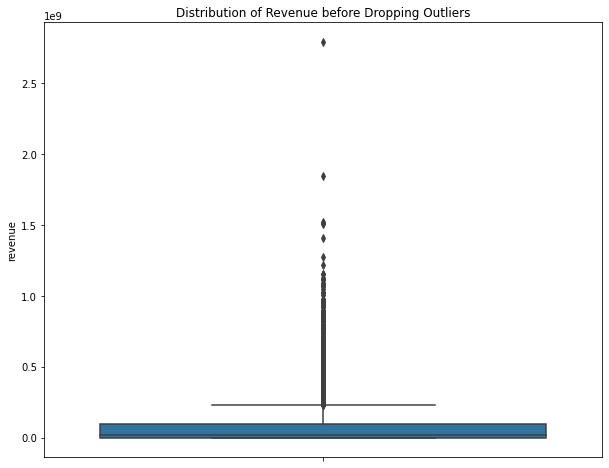

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['revenue'])
plt.title('Distribution of Revenue before Dropping Outliers')
plt.show()

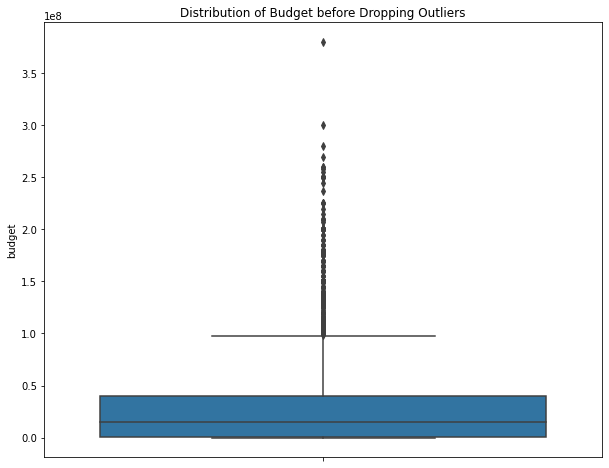

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['budget'])
plt.title('Distribution of Budget before Dropping Outliers')
plt.show()

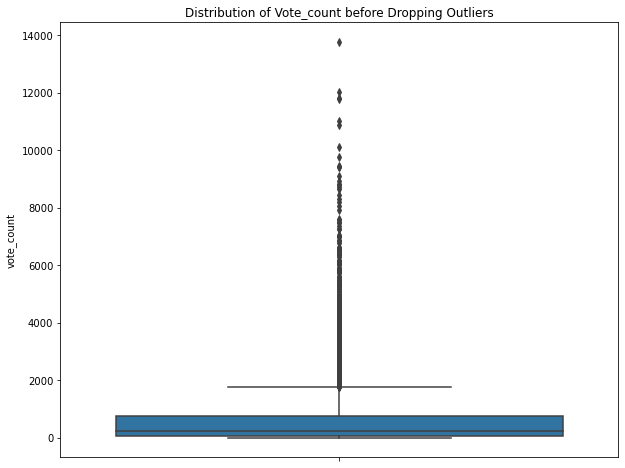

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['vote_count'])
plt.title('Distribution of Vote_count before Dropping Outliers')
plt.show()

Two figures above show that most of revenue and budget of movies are under 500,000,000 and 100,000,000. However there are many outliers need to be dropped. So, we determined that the value higher than 95% and lower than 5% are outliers.

In [29]:
def outlier(df, cname):
    maxthresold = df[cname].quantile(0.95)
    minthresold = df[cname].quantile(0.05)
    df = df[(df[cname]<maxthresold) & (df[cname]>minthresold)]
    return df

In [30]:
for i in ['budget', 'revenue', 'vote_count']:
    raw_df = outlier(raw_df, i)

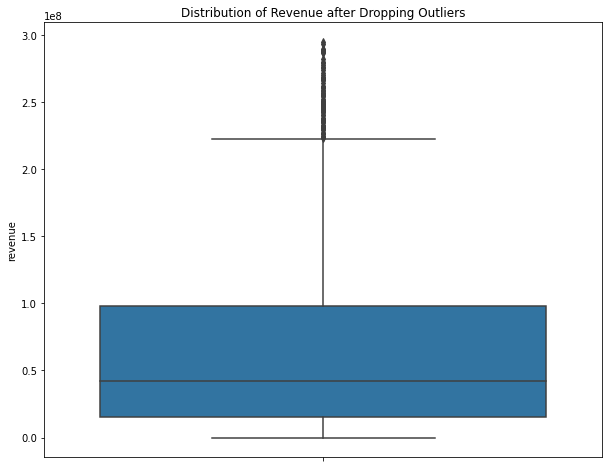

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['revenue'])
plt.title('Distribution of Revenue after Dropping Outliers')
plt.show()

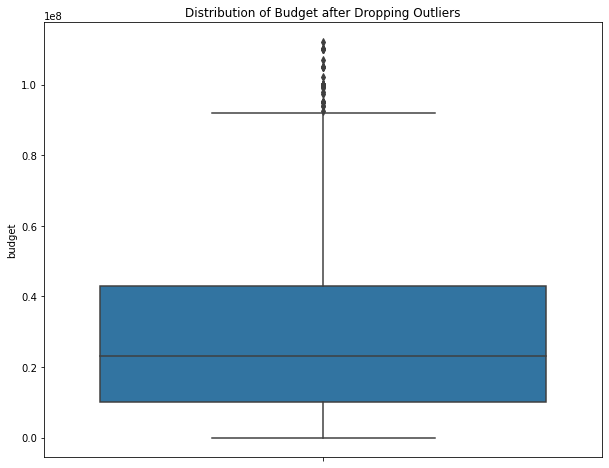

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['budget'])
plt.title('Distribution of Budget after Dropping Outliers')
plt.show()

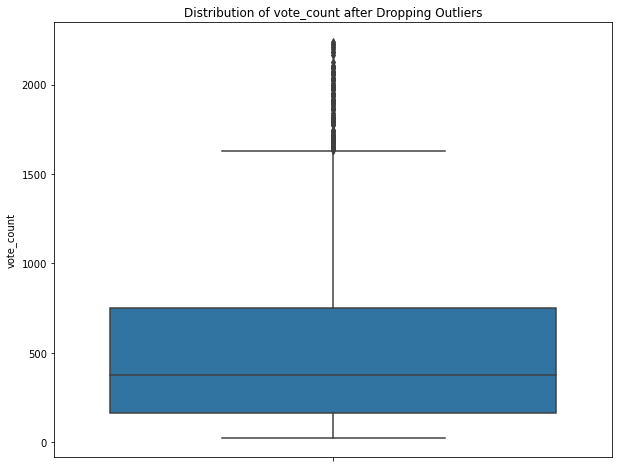

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(y=raw_df['vote_count'])
plt.title('Distribution of vote_count after Dropping Outliers')
plt.show()

After dropping outliers, there only have less outlier which are acceptable. Make a copy of our cleaned data.

In [34]:
data = raw_df.copy()

Now, we get the cleaned data.

# Data Visualization
## Release Date
We want to split release date into its year, month and day. Such that, we could count the number of movies released by day of week, month and year.

In [35]:
data['release_date'].head()

97     2016-07-29
151    2007-11-05
155    2005-12-21
188    2010-07-21
207    1990-06-01
Name: release_date, dtype: object

In [36]:
data['release_date'] = pd.to_datetime(data['release_date'])
lst = ['year','month','weekday']
for i in lst:
    data[i] = getattr(data['release_date'].dt, i).astype('int')
data.head()

,budget,genres,movie_id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,...,status,vote_average,vote_count,title,cast,crew,Director,year,month,weekday
97,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",315011,"[monster, godzilla, giant monster, destruction...",ja,シン・ゴジラ,9.476999,"[Cine Bazar, Toho Pictures]",[Japan],2016-07-29,...,Released,6.5,143,Shin Godzilla,"[Hiroki Hasegawa, Yutaka Takenouchi, Satomi Is...","[{""credit_id"": ""5921d321c3a368799b05933f"", ""de...",Hideaki Anno,2016,7,4
151,70000000,"[Adventure, Action, Animation]",2310,"[denmark, nordic mythology, lie, pride and van...",en,Beowulf,35.601665,"[Paramount Pictures, Shangri-La Entertainment,...",[United States of America],2007-11-05,...,Released,5.5,841,Beowulf,"[Ray Winstone, Angelina Jolie, Anthony Hopkins...","[{""credit_id"": ""52fe434cc3a36847f8049c1b"", ""de...",Robert Zemeckis,2007,11,0
155,100000000,[Comedy],7552,"[based on novel, desperation, robber, hold-up ...",en,Fun with Dick and Jane,25.159168,"[Imagine Entertainment, Columbia Pictures Corp...",[United States of America],2005-12-21,...,Released,5.9,627,Fun with Dick and Jane,"[Jim Carrey, Téa Leoni, Alec Baldwin, Richard ...","[{""credit_id"": ""56757f0192514179d2002f80"", ""de...",Dean Parisot,2005,12,2
188,110000000,"[Action, Mystery, Thriller]",27576,"[assassination, spy, cia, kidnapping, cold war...",en,Salt,48.829437,"[Columbia Pictures, Di Bonaventura Pictures, R...",[United States of America],2010-07-21,...,Released,6.2,2093,Salt,"[Angelina Jolie, Liev Schreiber, Chiwetel Ejio...","[{""credit_id"": ""536b7b400e0a2647c800c203"", ""de...",Phillip Noyce,2010,7,2
207,65000000,"[Action, Adventure, Science Fiction]",861,"[oxygen, falsely accused, resistance, mars, do...",en,Total Recall,43.129703,"[TriStar Pictures, Carolco Pictures, Carolco I...",[United States of America],1990-06-01,...,Released,7.1,1710,Total Recall,"[Arnold Schwarzenegger, Sharon Stone, Rachel T...","[{""credit_id"": ""52fe4283c3a36847f8024ec5"", ""de...",Paul Verhoeven,1990,6,4


### Movie Release Count per Week

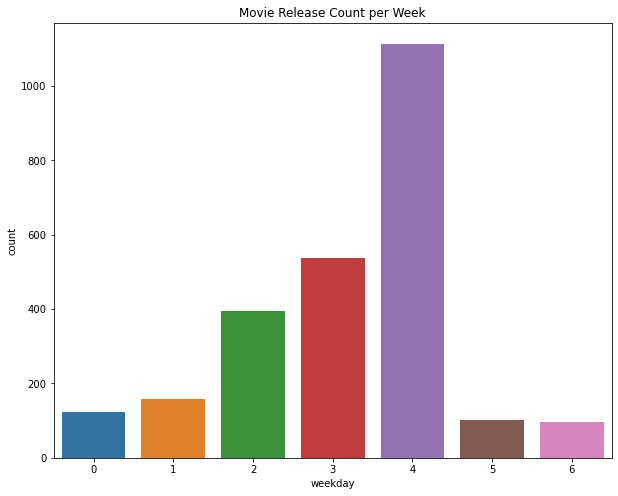

In [37]:
plt.figure(figsize = (10,8))
sns.countplot(x='weekday', data = data)
plt.title("Movie Release Count per Week")
plt.show()

From the distribution of the movies release per week, we can find the most films released on Friday. This is followed by Thursdays and Wednesdays. Saturday and Sunday, on the contrary, have the least released movies.

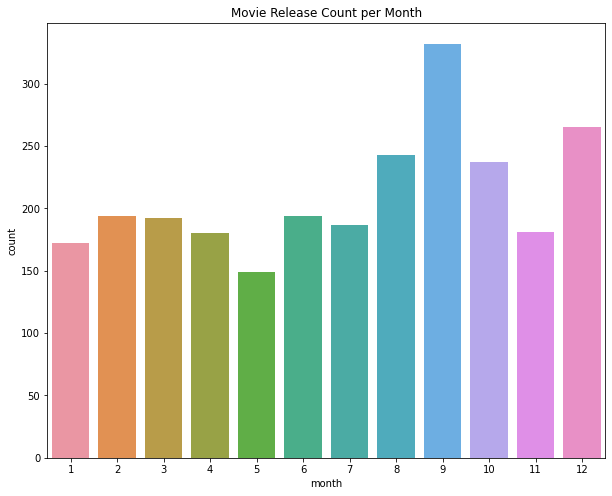

In [38]:
plt.figure(figsize = (10,8))
sns.countplot(x='month', data = data)
plt.title("Movie Release Count per Month")
plt.show()

From the monthly movie release distribution chart, we can see that the most movies were released in September while the least movies were released in May.

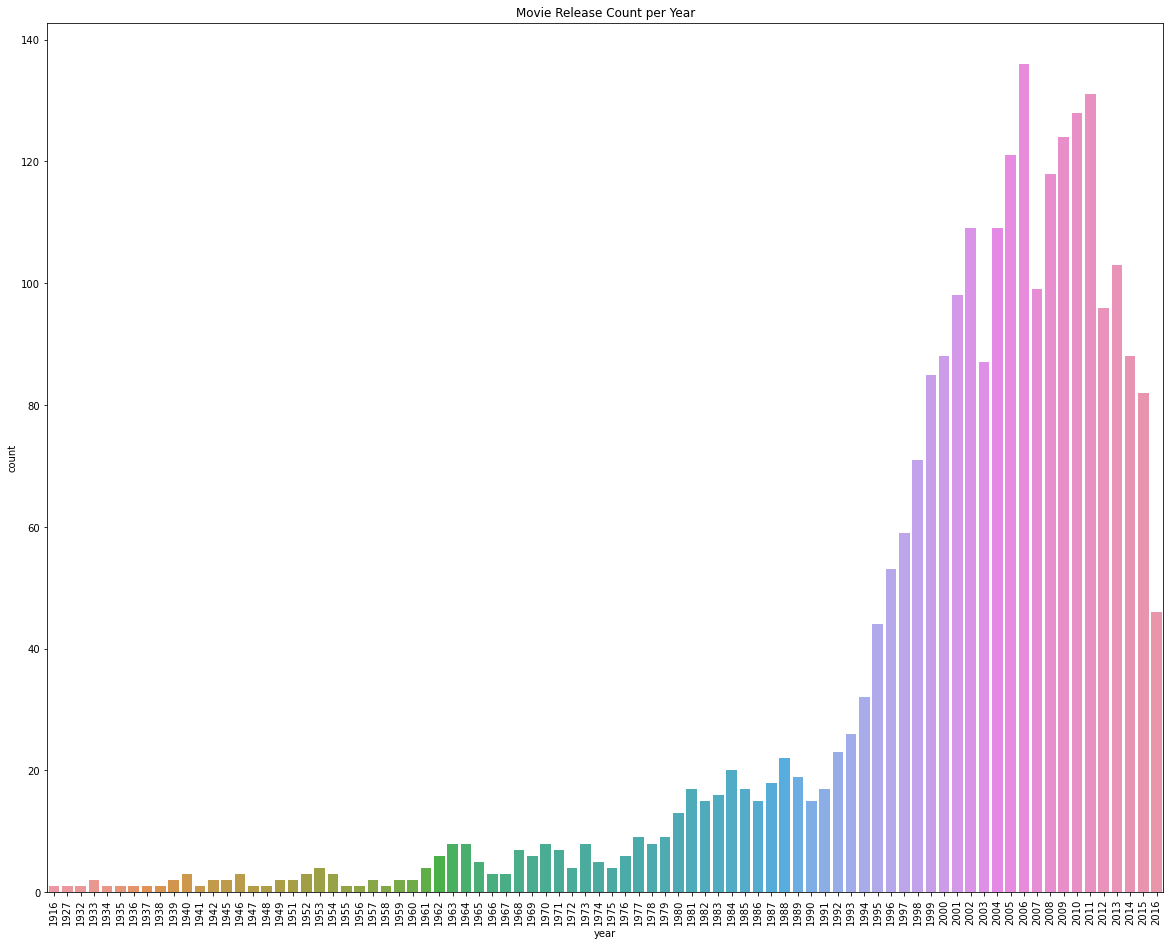

In [39]:
plt.figure(figsize = (20,16))
sns.countplot(x='year', data = data)
plt.title("Movie Release Count per Year")
plt.xticks(rotation = 'vertical')
plt.show()

The annual distribution of movie releases illustrates that the earliest movie release recorded in the dataset was in 1916. There have been a small number of movie releases since then. It was not until after 1980 that the film industry came to a booming period. The number of movie releases increased dramatically. In the 21st century, the number of movie releases exploded even more, with as many as 150 movies released worldwide in a year.

### Correlation Heatmap

<AxesSubplot:>

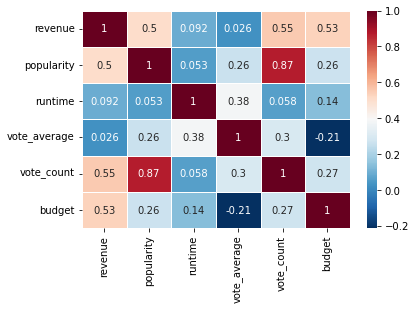

In [40]:
pearsoncorr = data.loc[:,['revenue','popularity','runtime','vote_average','vote_count','budget']].corr(method='pearson')
sns.heatmap( pearsoncorr, 
            xticklabels=pearsoncorr.columns, 
            yticklabels=pearsoncorr.columns, 
            cmap='RdBu_r', 
            annot=True, 
            linewidth=0.5 )

From the heatmap of the Pearson correlation, we could find that the budget has the most positive correlation. It indicates that the higher budget the movie input, the higher revenue the movie will get. Vote average has the least positive correlation with the revenue. 

### Genre Trend Shifting Patterns

In [41]:
genres_df = data['genres'].apply(pd.Series)
genres_df.head()

,0,1,2,3,4,5,6
97,Action,Adventure,Drama,Horror,Science Fiction,NaN,NaN
151,Adventure,Action,Animation,NaN,NaN,NaN,NaN
155,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
188,Action,Mystery,Thriller,NaN,NaN,NaN,NaN
207,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN


In [42]:
stacked_genres = genres_df.stack()
stacked_genres.head()

97  0             Action
    1          Adventure
    2              Drama
    3             Horror
    4    Science Fiction
dtype: object

In [43]:
raw_dummies = pd.get_dummies(stacked_genres)
raw_dummies.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
97 0       1          0          0       0      0            0      0       0   
   1       0          1          0       0      0            0      0       0   
   2       0          0          0       0      0            0      1       0   
   3       0          0          0       0      0            0      0       0   
   4       0          0          0       0      0            0      0       0   

      Fantasy  History  Horror  Music  Mystery  Romance  Science Fiction  \
97 0        0        0       0      0        0        0                0   
   1        0        0       0      0        0        0                0   
   2        0        0       0      0        0        0                0   
   3        0        0       1      0        0        0                0   
   4        0        0       0      0        0        0                1   

      Thriller  War  Western  
97 0         0    0        0  
   1         0    0        0  
   2         0    0        0  
   3         0    0        0  
   4         0    0        0

In [44]:
genres_dummies = raw_dummies.sum(level=0)
genres_dummies.head(3)

/var/folders/5n/xdbycb5n3dx6rxxjnkh477y00000gn/T/ipykernel_67136/568268698.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_dummies = raw_dummies.sum(level=0)


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
97,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
151,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
155,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
genres_dummies['year'] = data['year']
genres_dummies.head(3)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,year
97,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2016
151,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007
155,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2005


In [46]:
grouped = genres_dummies.groupby('year')
groupedCnt = grouped.agg(np.sum).transpose()
groupedCnt

year,1916,1927,1932,1933,1934,1935,1936,1937,1938,1939,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Action,0,0,0,0,0,0,0,0,0,0,...,21,26,25,28,34,22,18,15,15,15
Adventure,0,0,0,0,0,0,0,0,0,1,...,9,23,18,12,10,6,13,8,10,6
Animation,0,0,0,0,0,0,0,1,0,0,...,3,4,7,3,3,6,9,2,3,0
Comedy,0,0,0,2,1,1,1,0,1,1,...,31,49,49,53,52,39,34,26,25,15
Crime,0,0,0,0,0,0,0,0,0,0,...,21,18,18,20,14,18,23,13,13,4
Documentary,0,0,0,0,0,0,0,0,0,0,...,2,0,1,3,2,2,0,0,0,0
Drama,1,1,1,0,0,0,1,0,0,1,...,48,59,59,66,60,42,50,44,44,18
Family,0,0,0,0,0,0,0,1,0,1,...,8,14,16,10,12,7,10,8,3,2
Fantasy,0,0,0,0,0,0,0,1,0,1,...,6,9,11,11,9,5,5,5,4,1
History,0,0,0,0,0,0,0,0,0,0,...,5,4,7,3,5,4,4,2,6,5


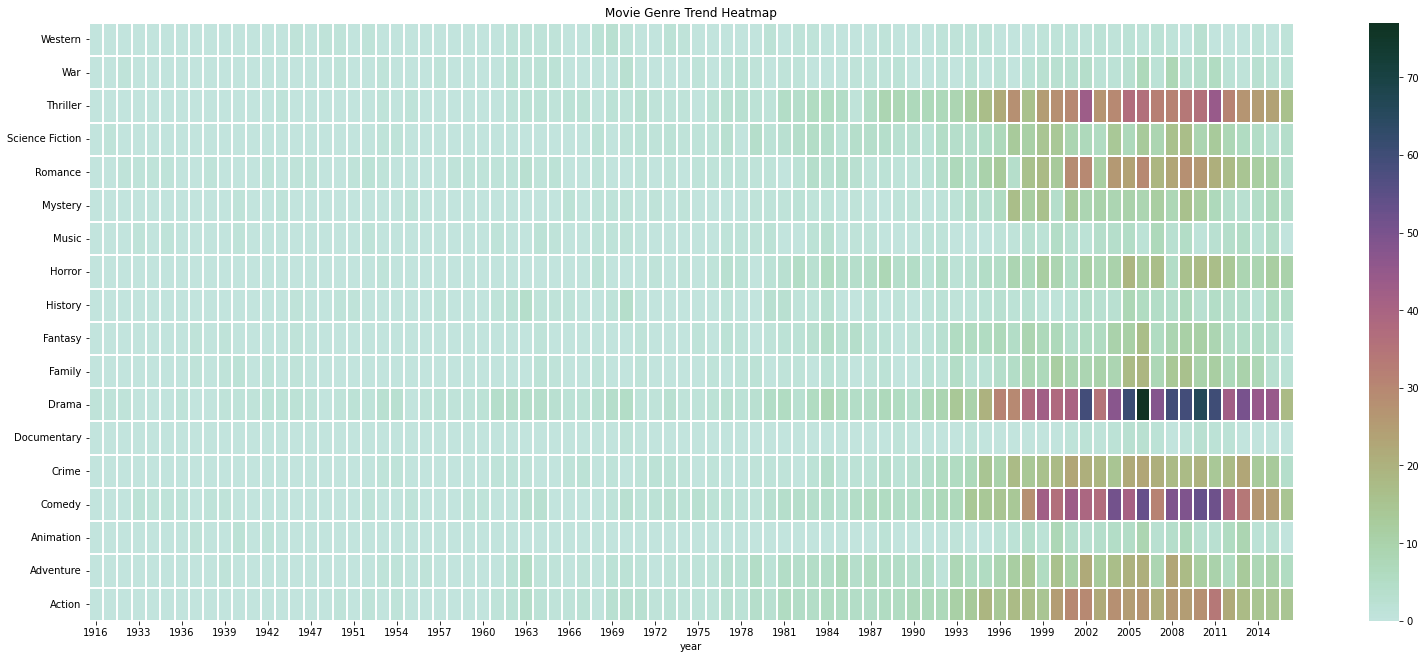

In [47]:
plt.figure(figsize=(27,11))
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(groupedCnt, xticklabels=3, cmap=cmap, linewidths=0.05).invert_yaxis()
plt.title('Movie Genre Trend Heatmap')
plt.show()

<AxesSubplot:xlabel='year'>

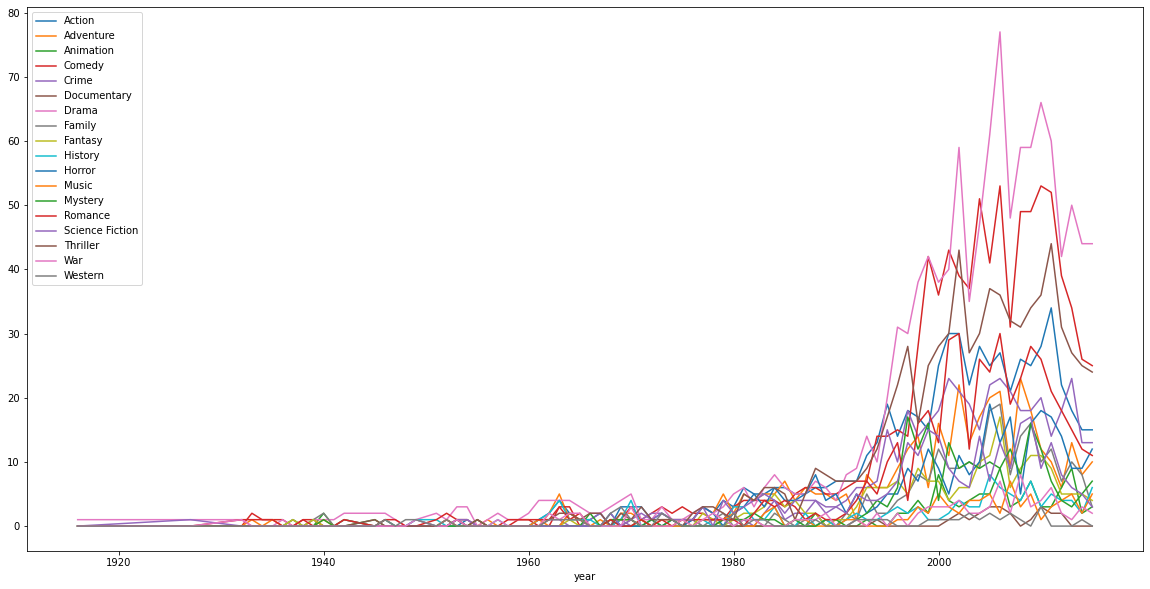

In [48]:
groupedCnt.T.sort_index()[:-1].plot.line(figsize = (20,10))

From the heatmap, we could easily find the five most popular generes which are 'Drama', 'Comedy', 'Thriller', 'Action' and 'Romance'. From the line graph we can see that ‘Drama’ has been a popular category since movies first appeared and all types of movies have shown a growth trend.

# Modeling
## Choose Features
According to the correlation matrix above, we found that budget, popularity and vote_count have a higher correlation with the revenue. However, the correlation of vote_count and popularity is too high. Hence, we only choose vote_count and budget in the following models.

In [49]:
data[['revenue', 'budget', 'vote_count']].describe()

,revenue,budget,vote_count
count,2.526000e+03,2.526000e+03,2526.000000
mean,6.554095e+07,2.947258e+07,534.114410
std,6.404430e+07,2.488870e+07,481.765619
min,5.000000e+00,1.000000e+00,26.000000
25%,1.563141e+07,1.000000e+07,163.250000
50%,4.235547e+07,2.300000e+07,373.500000
75%,9.831186e+07,4.300000e+07,750.000000
max,2.944566e+08,1.120000e+08,2237.000000


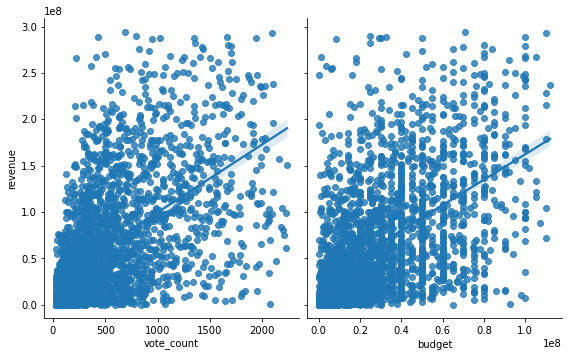

In [82]:
sns.pairplot(data, x_vars=['vote_count','budget'], y_vars='revenue',kind="reg", height=5, aspect=0.8)
plt.show()

## Feature Scaling
The description of the data shows enormous gaps between the largest/smallest and median values. It means no coefficient can use the feature without blowing up on big values.
Thus, we replace such features x with log(x).

In [50]:
data["logre"] = data['revenue'].map(lambda x:np.log(x+1))
data["logbud"] = data['budget'].map(lambda x:np.log(x+1))
data["logvote"]=data['vote_count'].map(lambda x:np.log(x+1))

## Implement Models

In [51]:
import math
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

### Linear Regression

After data processing, we made prediction of revenue based on vote_count and budget multi-linear regression. In the graph on the right, the X-axis represents vote_count and budget, and the Y-axis represents revenue. According to the previous Heatmap of the Pearson correlation, it can be seen that popularity, vote_count and budget are most correlated with revenue. I chose vote_count and budget because popularity and Vote_count have a strong correlation of 0.87. If I put three variables there, then the collinear phenomena may occur. Since the variables of the X-axis are highly correlated, they will affect the prediction, and other variables cannot be fixed, so the real relationship between X and Y cannot be found.

In [83]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
dfm1 = data[["logre","logbud","logvote"]]

In [84]:
X = dfm1[["logbud","logvote"]].values
y = dfm1.logre.values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
md1 = LinearRegression()  
md1.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = md1.predict(X_test)

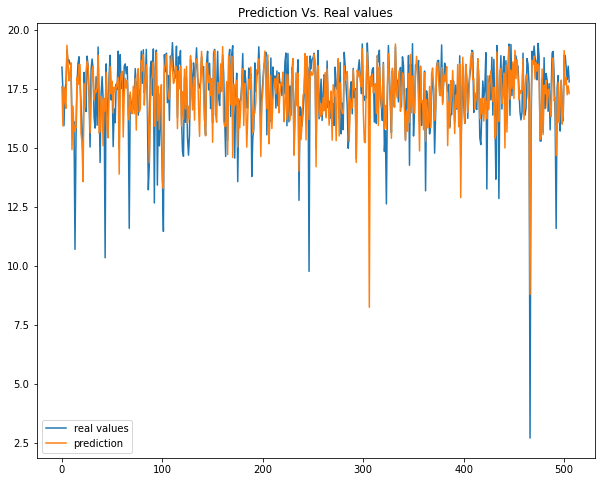

In [87]:
acc = y_test
pre = y_pred
plt.figure(figsize = (10,8))
plt.plot(acc,label = 'real values')
plt.plot(pre, label = 'prediction')
plt.legend()
plt.title('Prediction Vs. Real values')
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.781572673634959
Mean Squared Error: 1.3484192347888506
Root Mean Squared Error: 1.161214551574708


When making predictions, the mean absolute error between the predicted and observed values is 0.78, I think it's good, because it represents the absolute difference between the actual value and the forecast value.


Mean Squared error is 1.35, there is no overfit in this group of predictions. Because MSE equals 0 is theoretically the best, the closer you get to 0, the better prediction you get. However, if the MSE is too small, it may indicate that the model is overfit; if the MSE is too large, it may indicate that the model is underfit.

The root mean squared error is 1.16. This means it fits the data fairly well, because it's close to zero.

In [89]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(md1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores)
print(scores.mean())

[0.88057459 0.89725257 0.80694632 0.87003787 0.86942442]
0.8648471547682235


We separate the training data into 5 groups to make cross-validation and this is the mean value of five scores. This process is used to estimate the skill of the model on new data and overcome the overfitting and underfitting problems. Now, the cross validation score shows a good performance of the multiple linear regression model in other data sets not only in the train and test data set. But, we still need to compare this model with the rest two models.

In [90]:
print(RSE(y_test, y_pred))

1.1635162675133388


This is the residual standard error of the multi-linear regression. It is close to 0 which means the model is accuracy.

## Logistic Regression

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dfm2 = data[["logre","logbud","logvote"]]

for index, row in dfm2.iterrows():
    if row["logbud"] >= row["logre"]:
        dfm2.loc[index, "Target"] = 0
    else:
        dfm2.loc[index, "Target"] = 1
dfm2.Target = dfm2.Target.astype(int)

/var/folders/5n/xdbycb5n3dx6rxxjnkh477y00000gn/T/ipykernel_67136/3790494380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm2.loc[index, "Target"] = 1
/var/folders/5n/xdbycb5n3dx6rxxjnkh477y00000gn/T/ipykernel_67136/3790494380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm2.Target = dfm2.Target.astype(int)


In [92]:
X = dfm2[["logbud", "logvote"]].values
y = dfm2.Target

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
md2 = LogisticRegression()
md2.fit(x_train, y_train)

LogisticRegression()

In [95]:
predictions = md2.predict(x_test)

In [96]:
print(RSE(y_test, predictions))

0.45206756062017917


This is the residual standard error of the logistic regression. It shows a larger value than the residual standard error of the multiple linear regression. Hence, multiple linear regression is better than logistic regression in the test data set.


In [97]:
scores = cross_val_score(md2, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.77227723 0.77722772 0.78465347 0.73267327 0.75      ]
0.7633663366336634


The mean value of the cross validation score is 0.76. It shows a decrease in the score compared to the mean score of multiple linear regression cross validation. This indicates that the logistic regression model shows a lower accuracy.

## Polynomial Regression
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. 

In [98]:
train_df = data[:int(len(data)*0.8)]
test_df = data[int(len(data)*0.8):]

In [99]:
train_x = train_df[['logvote']].values
train_y = train_df['revenue'].apply(np.log1p).values
test_x = test_df['logvote'].values
test_y = test_df['revenue'].apply(np.log1p).values

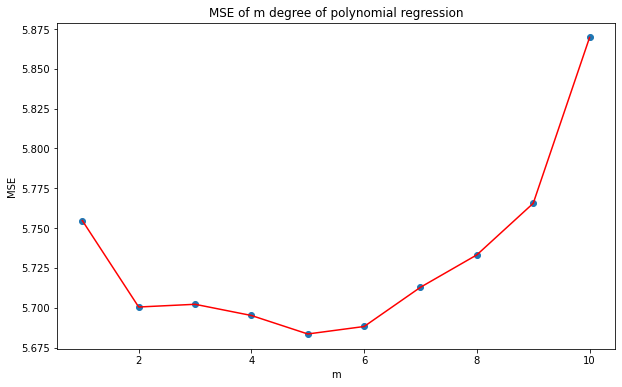

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
mse = []
m = 1
m_max = 10
train_x = train_x.reshape(len(train_x),1)
test_x = test_x.reshape(len(test_x),1)
train_y = train_y.reshape(len(train_y),1)
while m<=m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False),LinearRegression())
    model.fit(train_x,train_y)
    pre_y = model.predict(test_x)
    mse.append(mean_squared_error(test_y, pre_y.flatten()))
    m = m+1
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1, m_max+1)], mse, 'r')
plt.scatter([i for i in range(1, m_max+1)], mse)
plt.title('MSE of m degree of polynomial regression')
plt.xlabel('m')
plt.ylabel('MSE')
plt.show()

In Polynomial Regression, I first set degree of polynomial regression from 1 to 10. Then, I record the mean square error for each time. From the graph above, we can see that when the degree equals to 5 the mean square error be the least. So, we decided the degree of polynomial regression is 5.

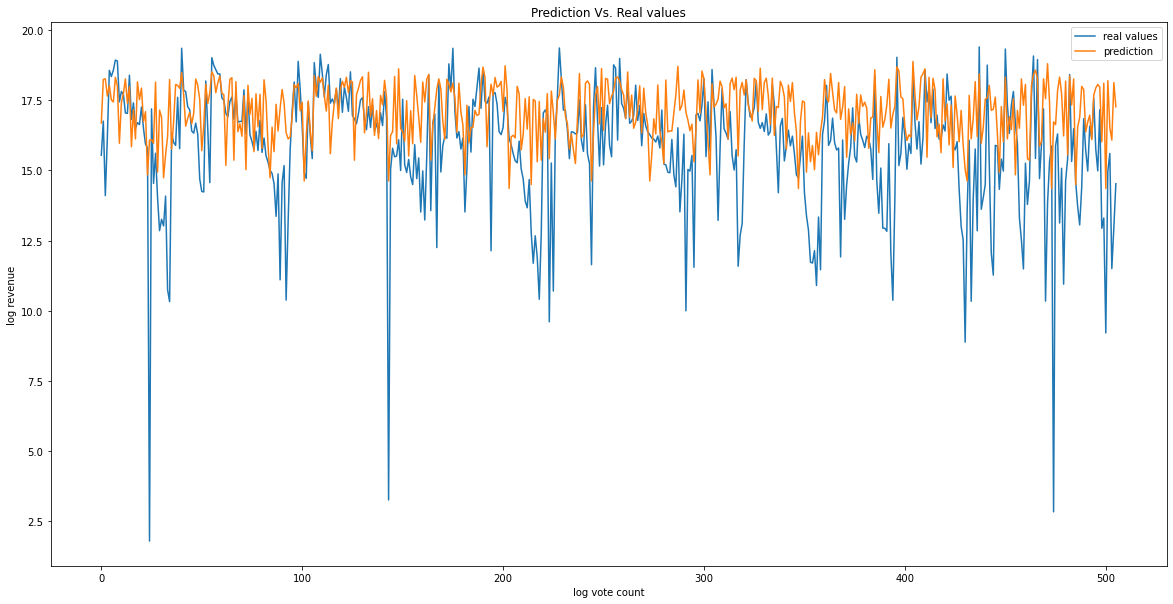

In [101]:
model = make_pipeline(PolynomialFeatures(5, include_bias=False),LinearRegression())
model.fit(train_x,train_y)
pre_y = model.predict(test_x)
acc = test_y
pre = pre_y
plt.figure(figsize = (20,10))
plt.plot(acc,label = 'real values')
plt.plot(pre, label = 'prediction')
plt.xlabel('log vote count')
plt.ylabel('log revenue')
plt.legend()
plt.title('Prediction Vs. Real values')
plt.show()

In [102]:
print(RSE(test_y, pre_y))

61.58304906404056


This is the residual standard error of the polynomial regression. We could easily find that this number is much larger than the residual standard error of the multiple linear regression. Hence, the multiple linear regression model is much better than the polynomial regression model in the test data set.

In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("polynomial regression mean absolute error: ", mean_absolute_error(test_y,pre_y.flatten()))
print("polynomial regression mean squared error: ", mean_squared_error(test_y,pre_y.flatten()))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

polynomial regression mean absolute error:  1.6290956840608994
polynomial regression mean squared error:  5.683510728153394
Root Mean Squared Error: 16.54425549041142


The mean absolute error between the predicted and observed values is 1.63. It is higher than the mean absolute error than multiple linear regression. It indicates the error between true value and predict value is larger.

Mean Squared error is 5.68 which indicates that this model is not fitter than the multiple linear regression.

This is the root mean square error of polynomial regression. It indicates that the model do not fit the data well since the value of RMSE is too large.

In [104]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(model, train_x, train_y, cv=5, scoring='neg_mean_absolute_error')
print(scores)
print(scores.mean())

[0.76341057 0.65232188 0.74835349 0.85855298 1.08719215]
0.8219662124365467


This is the mean value of the five cross validation scores. This value is larger than the value of logistic regression but lower than the multiple linear regression. Only discussing the cross validation score, the polynomial regression model shows a better performance in new datasets than the logistic regression.

# Conclusion
From the exploration data analysis, we could conclude that more movie producers prefer release movies on Fridays or summer. 

It was not until after 1980 that the film industry came to a booming period. 

 ‘Drama’ has been a popular category since movies first appeared and all types of movies have shown a growth trend from about 1990. Between 2005 and 2010, most genre films reached their peak. And after 2010, there was a certain degree of decline.
 
Vote_count is the most correlated factor in predicting the revenue of the movie, while vote average is the least correlated factor.


According to the residual standard error and the mean cross validation score, the multiple linear regression gives the best performance compared to the rest two models.

It has the least residual standard error which indicates that it is the most accuracy in the test data set. Meanwhile, it has the highest mean cross validation score which indicates that it also have a good performance in the new datasets rather than the train and test dataset.

Besides, we suppose that the polynomial regression is better than the logistic regression. Firstly, the polynomial regression is a numeric prediction model while the logistic regression is a classification prediction model. Then, the logistic regression has the worst performance in new datasets. It will give inaccuracy prediction if we use this model to make a prediction of the movie revenue.